In [177]:
from random import choices
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import random

In [178]:
plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = (2*6.4,2*4.8)

# PSO:

In [202]:
evals = 3000
genes = 1000
repeat = 5
n = 100
Ps = 0
# w = 1-Ps
w = np.tile(0.4,(repeat,n,genes))
v_max = 0.02
x_max = 2
# lr = 0.005
x = np.tile(np.random.uniform(low = -2, high= 2, size=(n,genes)),(repeat,1,1))
p = x
v = np.tile(np.random.uniform(low = -v_max, high = v_max, size=(n,genes)),(repeat,1,1))
g2 = x[np.arange(len(x)),np.argmin(np.sum(np.square(x),axis = 2),axis = 1),:]
g = np.repeat(g2[:, np.newaxis,:],n, axis=1)
c1,c2 = 2,2
r1 = np.random.uniform(0, 1, size=(repeat,n,genes))
r2 = np.random.uniform(0, 1, size=(repeat,n,genes))

In [203]:
costs_PSO = []
for i in range(evals):
    r1 = np.random.uniform(0, 1, size=(repeat,n,genes))
    r2 = np.random.uniform(0, 1, size=(repeat,n,genes))
    if i%1000 == 0:
        print(i)
    v = w*v + c1*r1*(p-x) + c2*r2*(g-x)
    x_new = x + v*lr
#     v = w*v + c1*r1*(p-x) + c2*r2*(g-x)
    f_p, f_x, f_x_new = np.sum(np.square(p),axis = 2), np.sum(np.square(x),axis = 2), np.sum(np.square(x_new),axis = 2) 
    compare = f_x < f_p
    compare2 = f_x_new < f_x
    Ps = np.sum(compare2,axis = 1)/n
    compare = np.tile(compare.T, (genes,1,1)).T
    p = compare*x + (1-compare)*p
    w = np.tile(((1-Ps)**2).T,(genes,n,1)).T
    g2 = x[np.arange(len(x)),np.argmin(np.sum(np.square(x),axis = 2),axis = 1),:]
    g = np.repeat(g2[:, np.newaxis,:],n, axis=1)
    x = np.copy(x_new)
    costs_PSO.append(np.mean(np.sum(np.square(g2),axis = 1)))
costs_PSO = np.array(costs_PSO)

0
[0. 0. 0. 0. 0.]
[0.01 0.01 0.01 0.   0.01]
[0.01 0.   0.   0.01 0.01]
[0.   0.01 0.01 0.   0.  ]
[0.01 0.01 0.   0.01 0.01]
[0.02 0.01 0.01 0.02 0.02]
[0.02 0.03 0.03 0.04 0.02]
[0.04 0.04 0.03 0.11 0.03]
[0.1  0.07 0.07 0.17 0.12]
[0.2  0.18 0.15 0.28 0.22]
[0.32 0.29 0.29 0.41 0.4 ]
[0.6  0.57 0.33 0.39 0.48]
[0.19 0.25 0.55 0.56 0.44]
[0.8  0.79 0.26 0.36 0.55]
[0.1  0.12 0.74 0.7  0.36]
[0.67 0.7  0.14 0.17 0.61]
[0.16 0.15 0.64 0.69 0.3 ]
[0.73 0.79 0.19 0.16 0.74]
[0.21 0.14 0.73 0.64 0.26]
[0.72 0.69 0.15 0.24 0.77]
[0.22 0.22 0.68 0.78 0.22]
[0.77 0.81 0.22 0.2  0.66]
[0.17 0.18 0.73 0.61 0.2 ]
[0.66 0.71 0.2  0.26 0.55]
[0.3  0.22 0.72 0.75 0.19]
[0.71 0.79 0.24 0.23 0.43]
[0.28 0.16 0.62 0.71 0.26]
[0.66 0.65 0.34 0.19 0.44]
[0.31 0.23 0.71 0.64 0.2 ]
[0.71 0.61 0.18 0.24 0.35]
[0.25 0.39 0.61 0.63 0.1 ]
[0.59 0.64 0.2  0.28 0.12]
[0.3  0.31 0.58 0.32 0.06]
[0.63 0.51 0.29 0.33 0.06]
[0.09 0.18 0.52 0.22 0.07]
[0.33 0.5  0.32 0.18 0.09]
[0.14 0.18 0.66 0.14 0.09]
[0.35 0.3

[0.16 0.16 0.27 0.21 0.34]
[0.25 0.1  0.39 0.12 0.07]
[0.19 0.11 0.09 0.2  0.22]
[0.11 0.17 0.29 0.16 0.17]
[0.25 0.26 0.28 0.17 0.32]
[0.17 0.17 0.39 0.25 0.11]
[0.17 0.26 0.11 0.24 0.27]
[0.21 0.27 0.29 0.21 0.22]
[0.38 0.23 0.19 0.18 0.24]
[0.28 0.2  0.22 0.15 0.13]
[0.35 0.15 0.23 0.13 0.14]
[0.05 0.24 0.24 0.12 0.15]
[0.22 0.39 0.25 0.14 0.21]
[0.17 0.14 0.23 0.16 0.09]
[0.25 0.26 0.14 0.16 0.15]
[0.13 0.08 0.16 0.19 0.23]
[0.25 0.3  0.17 0.13 0.17]
[0.13 0.16 0.27 0.49 0.17]
[0.23 0.43 0.34 0.07 0.12]
[0.27 0.15 0.24 0.4  0.14]
[0.15 0.26 0.25 0.07 0.07]
[0.12 0.23 0.24 0.21 0.16]
[0.12 0.24 0.21 0.29 0.18]
[0.11 0.25 0.17 0.33 0.18]
[0.13 0.23 0.2  0.33 0.19]
[0.1  0.12 0.16 0.26 0.27]
[0.18 0.27 0.14 0.49 0.16]
[0.16 0.19 0.16 0.33 0.27]
[0.2  0.33 0.17 0.23 0.19]
[0.21 0.21 0.23 0.26 0.21]
[0.11 0.32 0.4  0.31 0.21]
[0.12 0.19 0.16 0.13 0.24]
[0.17 0.31 0.18 0.27 0.12]
[0.14 0.17 0.2  0.17 0.19]
[0.2  0.32 0.16 0.24 0.19]
[0.21 0.15 0.23 0.2  0.16]
[0.23 0.21 0.29 0.43 0.15]
[

[0.25 0.29 0.27 0.28 0.18]
[0.1  0.17 0.16 0.22 0.36]
[0.16 0.16 0.17 0.33 0.18]
[0.09 0.14 0.17 0.22 0.48]
[0.29 0.15 0.29 0.32 0.23]
[0.15 0.13 0.1  0.1  0.41]
[0.51 0.23 0.17 0.14 0.24]
[0.32 0.11 0.15 0.12 0.41]
[0.43 0.17 0.28 0.11 0.26]
[0.19 0.28 0.16 0.14 0.42]
[0.34 0.17 0.24 0.26 0.24]
[0.26 0.11 0.15 0.1  0.31]
[0.29 0.09 0.29 0.17 0.29]
[0.21 0.19 0.11 0.23 0.25]
[0.26 0.16 0.17 0.12 0.22]
[0.23 0.27 0.17 0.3  0.25]
[0.26 0.23 0.35 0.26 0.23]
[0.25 0.34 0.1  0.32 0.26]
[0.12 0.31 0.32 0.14 0.3 ]
[0.23 0.19 0.27 0.29 0.3 ]
[0.09 0.19 0.4  0.15 0.22]
[0.23 0.35 0.17 0.22 0.31]
[0.23 0.17 0.26 0.14 0.15]
[0.36 0.25 0.18 0.24 0.24]
[0.22 0.19 0.24 0.19 0.13]
[0.13 0.19 0.22 0.29 0.16]
[0.31 0.14 0.21 0.27 0.24]
[0.12 0.12 0.22 0.39 0.23]
[0.21 0.14 0.25 0.22 0.18]
[0.12 0.22 0.09 0.4  0.24]
[0.21 0.15 0.25 0.15 0.18]
[0.31 0.18 0.27 0.46 0.14]
[0.33 0.09 0.18 0.19 0.2 ]
[0.23 0.07 0.15 0.37 0.27]
[0.25 0.18 0.22 0.19 0.3 ]
[0.37 0.2  0.25 0.4  0.34]
[0.2  0.15 0.25 0.2  0.28]
[

[0.22 0.1  0.09 0.25 0.4 ]
[0.18 0.22 0.27 0.15 0.16]
[0.26 0.17 0.14 0.19 0.4 ]
[0.22 0.41 0.21 0.18 0.23]
[0.14 0.16 0.19 0.3  0.3 ]
[0.2  0.37 0.19 0.21 0.13]
[0.16 0.12 0.21 0.38 0.29]
[0.33 0.23 0.17 0.27 0.09]
[0.08 0.17 0.13 0.22 0.11]
[0.2  0.19 0.08 0.16 0.26]
[0.12 0.11 0.11 0.25 0.17]
[0.19 0.26 0.09 0.21 0.3 ]
[0.28 0.29 0.14 0.19 0.17]
[0.21 0.24 0.09 0.17 0.42]
[0.12 0.31 0.2  0.08 0.14]
[0.13 0.43 0.08 0.07 0.5 ]
[0.14 0.17 0.13 0.13 0.25]
[0.26 0.28 0.23 0.16 0.54]
[0.22 0.14 0.3  0.14 0.13]
[0.38 0.21 0.19 0.34 0.51]
[0.18 0.24 0.17 0.24 0.09]
[0.34 0.18 0.19 0.49 0.27]
[0.39 0.31 0.36 0.15 0.13]
[0.15 0.2  0.09 0.29 0.38]
[0.43 0.29 0.11 0.18 0.05]
[0.39 0.17 0.18 0.33 0.27]
[0.23 0.21 0.16 0.17 0.22]
[0.38 0.11 0.08 0.22 0.31]
[0.19 0.14 0.17 0.19 0.23]
[0.27 0.2  0.24 0.22 0.2 ]
[0.24 0.15 0.14 0.27 0.14]
[0.21 0.15 0.27 0.19 0.2 ]
[0.13 0.05 0.12 0.2  0.24]
[0.25 0.09 0.27 0.26 0.35]
[0.11 0.33 0.18 0.08 0.24]
[0.29 0.25 0.23 0.12 0.21]
[0.17 0.39 0.17 0.07 0.31]
[

[0.16 0.21 0.3  0.34 0.26]
[0.11 0.22 0.14 0.13 0.26]
[0.17 0.15 0.27 0.4  0.27]
[0.2  0.11 0.24 0.12 0.24]
[0.18 0.16 0.36 0.29 0.21]
[0.19 0.17 0.12 0.15 0.33]
[0.25 0.19 0.2  0.17 0.23]
[0.15 0.12 0.1  0.21 0.22]
[0.3  0.17 0.18 0.22 0.16]
[0.13 0.27 0.19 0.25 0.15]
[0.19 0.35 0.14 0.21 0.16]
[0.22 0.31 0.12 0.19 0.19]
[0.26 0.24 0.17 0.16 0.35]
[0.11 0.17 0.13 0.31 0.1 ]
[0.18 0.22 0.16 0.15 0.23]
[0.2  0.26 0.07 0.18 0.16]
[0.09 0.31 0.26 0.11 0.3 ]
[0.17 0.12 0.22 0.13 0.35]
[0.1  0.3  0.23 0.26 0.2 ]
[0.21 0.15 0.24 0.25 0.21]
[0.12 0.2  0.31 0.36 0.17]
[0.13 0.16 0.25 0.22 0.27]
[0.1  0.12 0.43 0.42 0.12]
[0.12 0.33 0.17 0.11 0.26]
[0.15 0.14 0.35 0.21 0.15]
[0.22 0.43 0.16 0.09 0.1 ]
[0.2  0.09 0.41 0.12 0.15]
[0.24 0.33 0.09 0.24 0.28]
[0.31 0.11 0.25 0.25 0.13]
[0.1  0.26 0.17 0.22 0.25]
[0.08 0.16 0.35 0.2  0.28]
[0.13 0.21 0.15 0.18 0.39]
[0.21 0.21 0.17 0.22 0.26]
[0.21 0.22 0.26 0.14 0.27]
[0.21 0.27 0.31 0.09 0.31]
[0.16 0.19 0.13 0.12 0.2 ]
[0.25 0.25 0.3  0.18 0.21]
[

[0.22 0.2  0.12 0.38 0.2 ]
[0.24 0.26 0.19 0.16 0.32]
[0.16 0.38 0.17 0.32 0.12]
[0.1  0.21 0.27 0.11 0.25]
[0.15 0.33 0.37 0.24 0.13]
[0.17 0.21 0.16 0.14 0.34]
[0.21 0.3  0.23 0.32 0.23]
[0.17 0.2  0.3  0.11 0.49]
[0.26 0.3  0.19 0.33 0.22]
[0.18 0.25 0.19 0.23 0.43]
[0.19 0.13 0.18 0.5  0.18]
[0.13 0.21 0.25 0.11 0.24]
[0.14 0.14 0.4  0.38 0.22]
[0.25 0.17 0.44 0.16 0.38]
[0.24 0.15 0.39 0.24 0.18]
[0.16 0.24 0.41 0.16 0.38]
[0.14 0.25 0.36 0.27 0.18]
[0.17 0.2  0.38 0.19 0.15]
[0.11 0.06 0.27 0.24 0.23]
[0.16 0.17 0.42 0.15 0.24]
[0.18 0.2  0.27 0.24 0.12]
[0.13 0.19 0.39 0.14 0.18]
[0.12 0.21 0.24 0.19 0.26]
[0.16 0.22 0.26 0.15 0.29]
[0.13 0.25 0.23 0.16 0.24]
[0.15 0.36 0.38 0.09 0.19]
[0.13 0.07 0.16 0.09 0.25]
[0.14 0.23 0.25 0.15 0.21]
[0.15 0.14 0.07 0.16 0.23]
[0.22 0.16 0.18 0.11 0.18]
[0.23 0.11 0.18 0.05 0.24]
[0.23 0.23 0.2  0.1  0.24]
[0.14 0.16 0.12 0.22 0.46]
[0.21 0.27 0.16 0.27 0.16]
[0.13 0.3  0.22 0.14 0.37]
[0.18 0.32 0.17 0.2  0.18]
[0.23 0.06 0.13 0.22 0.6 ]
[

[0.32 0.15 0.32 0.23 0.25]
[0.2  0.11 0.27 0.2  0.14]
[0.37 0.22 0.31 0.19 0.24]
[0.02 0.21 0.15 0.23 0.2 ]
[0.18 0.2  0.21 0.27 0.16]
[0.12 0.18 0.12 0.17 0.2 ]
[0.18 0.21 0.29 0.21 0.16]
[0.1  0.09 0.18 0.14 0.25]
[0.26 0.21 0.17 0.3  0.37]
[0.17 0.2  0.2  0.13 0.37]
[0.16 0.24 0.14 0.19 0.4 ]
[0.29 0.24 0.28 0.13 0.26]
[0.19 0.35 0.06 0.15 0.27]
[0.23 0.24 0.1  0.17 0.32]
[0.1  0.3  0.21 0.17 0.2 ]
[0.16 0.32 0.26 0.2  0.3 ]
[0.19 0.34 0.28 0.11 0.29]
[0.11 0.2  0.12 0.21 0.09]
[0.09 0.44 0.2  0.21 0.16]
[0.17 0.23 0.16 0.2  0.16]
[0.06 0.52 0.25 0.28 0.18]
[0.14 0.24 0.04 0.2  0.09]
[0.18 0.36 0.15 0.31 0.17]
[0.16 0.21 0.17 0.23 0.38]
[0.18 0.25 0.2  0.32 0.09]
[0.2  0.24 0.1  0.16 0.2 ]
[0.16 0.23 0.17 0.3  0.25]
[0.28 0.21 0.13 0.11 0.22]
[0.1  0.22 0.19 0.2  0.15]
[0.24 0.29 0.15 0.21 0.09]
[0.23 0.15 0.37 0.2  0.16]
[0.38 0.25 0.36 0.22 0.06]
[0.16 0.24 0.29 0.14 0.1 ]
[0.4  0.19 0.26 0.19 0.16]
[0.12 0.23 0.42 0.16 0.16]
[0.28 0.44 0.26 0.17 0.19]
[0.27 0.13 0.29 0.13 0.1 ]
[

[0.2  0.14 0.21 0.11 0.36]
[0.27 0.21 0.14 0.26 0.14]
[0.26 0.4  0.23 0.2  0.32]
[0.14 0.12 0.2  0.28 0.17]
[0.3  0.28 0.23 0.29 0.27]
[0.24 0.17 0.19 0.21 0.19]
[0.17 0.23 0.25 0.18 0.26]
[0.35 0.23 0.31 0.15 0.12]
[0.25 0.11 0.18 0.15 0.16]
[0.21 0.16 0.18 0.16 0.18]
[0.15 0.1  0.32 0.15 0.22]
[0.12 0.13 0.16 0.13 0.13]
[0.08 0.16 0.27 0.15 0.2 ]
[0.14 0.2  0.22 0.36 0.21]
[0.16 0.23 0.34 0.06 0.19]
[0.2  0.29 0.17 0.09 0.22]
[0.12 0.35 0.26 0.07 0.13]
[0.35 0.22 0.22 0.14 0.28]
[0.28 0.36 0.26 0.14 0.13]
[0.46 0.25 0.13 0.2  0.24]
[0.1  0.53 0.22 0.18 0.05]
[0.39 0.06 0.2  0.37 0.11]
[0.19 0.23 0.17 0.2  0.06]
[0.51 0.2  0.15 0.23 0.03]
[0.19 0.31 0.28 0.19 0.2 ]
[0.56 0.21 0.21 0.16 0.27]
[0.34 0.21 0.35 0.2  0.3 ]
[0.54 0.34 0.16 0.13 0.27]
[0.29 0.21 0.31 0.22 0.23]
[0.29 0.32 0.18 0.19 0.47]
[0.3  0.27 0.25 0.23 0.4 ]
[0.38 0.31 0.29 0.25 0.38]
[0.38 0.21 0.21 0.25 0.26]
[0.34 0.29 0.24 0.44 0.39]
[0.3  0.26 0.19 0.21 0.15]
[0.32 0.15 0.29 0.32 0.27]
[0.22 0.25 0.26 0.18 0.18]
[

<ipython-input-203-8aca5c524af6>:11: RuntimeWarning: overflow encountered in square
  f_p, f_x, f_x_new = np.sum(np.square(p),axis = 2), np.sum(np.square(x),axis = 2), np.sum(np.square(x_new),axis = 2)
<ipython-input-203-8aca5c524af6>:19: RuntimeWarning: overflow encountered in square
  g2 = x[np.arange(len(x)),np.argmin(np.sum(np.square(x),axis = 2),axis = 1),:]


[0.24 0.15 0.06 0.17 0.16]
[0.34 0.13 0.05 0.25 0.21]
[0.16 0.07 0.1  0.14 0.24]
[0.27 0.01 0.17 0.2  0.21]
[0.22 0.01 0.37 0.16 0.22]
[0.19 0.01 0.22 0.32 0.11]
[0.21 0.   0.44 0.22 0.26]


C:\Users\sherw\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-203-8aca5c524af6>:22: RuntimeWarning: overflow encountered in square
  costs_PSO.append(np.mean(np.sum(np.square(g2),axis = 1)))


[0.21 0.   0.12 0.17 0.14]
[0.31 0.   0.23 0.18 0.15]
[0.28 0.   0.01 0.25 0.14]
[0.35 0.   0.01 0.15 0.18]
[0.18 0.   0.   0.19 0.17]
[0.19 0.   0.01 0.13 0.3 ]
[0.34 0.   0.   0.17 0.2 ]
[0.26 0.   0.   0.38 0.28]
[0.18 0.   0.   0.12 0.23]
[0.18 0.   0.   0.37 0.26]
[0.12 0.   0.   0.32 0.18]
[0.2  0.   0.   0.33 0.15]
[0.12 0.   0.   0.2  0.08]
[0.11 0.   0.   0.21 0.05]
[0.17 0.   0.   0.22 0.  ]
[0.18 0.01 0.   0.05 0.01]
[0.22 0.   0.   0.09 0.01]
[0.24 0.01 0.   0.04 0.01]
[0.18 0.   0.   0.01 0.  ]
[0.17 0.01 0.   0.01 0.  ]
[0.22 0.01 0.   0.   0.01]
[0.21 0.01 0.   0.01 0.  ]
[0.17 0.01 0.   0.   0.  ]
[0.24 0.   0.   0.   0.  ]
[0.14 0.01 0.   0.   0.  ]
[0.15 0.01 0.01 0.   0.  ]
[0.32 0.01 0.01 0.   0.  ]
[0.22 0.   0.01 0.   0.  ]
[0.22 0.   0.   0.   0.  ]
[0.1  0.01 0.   0.   0.  ]
[0.26 0.01 0.01 0.   0.  ]
[0.1  0.   0.01 0.   0.  ]
[0.02 0.01 0.   0.   0.  ]
[0.01 0.01 0.   0.   0.  ]
[0.01 0.01 0.01 0.   0.  ]
[0.   0.   0.01 0.   0.  ]
[0.   0.01 0.01 0.   0.  ]
[

[0.01 0.01 0.   0.01 0.01]
[0.01 0.   0.01 0.   0.01]
[0.01 0.01 0.01 0.   0.  ]
[0.01 0.01 0.01 0.01 0.01]
[0.01 0.   0.01 0.01 0.01]
[0.01 0.01 0.   0.01 0.  ]
[0.   0.   0.01 0.   0.  ]
[0.   0.01 0.   0.01 0.  ]
[0.   0.01 0.01 0.01 0.  ]
[0.01 0.   0.   0.01 0.01]
[0.01 0.01 0.   0.01 0.  ]
[0.   0.01 0.   0.01 0.01]
[0.01 0.01 0.01 0.01 0.01]
[0.   0.   0.01 0.   0.01]
[0.01 0.01 0.01 0.   0.  ]
[0.01 0.01 0.01 0.   0.01]
[0.   0.   0.01 0.01 0.  ]
[0.01 0.   0.01 0.01 0.  ]
[0.01 0.01 0.   0.01 0.01]
[0.01 0.01 0.   0.   0.  ]
[0.01 0.01 0.01 0.01 0.01]
[0. 0. 0. 0. 0.]
[0.01 0.01 0.   0.   0.01]
[0.01 0.01 0.01 0.   0.  ]
[0.01 0.01 0.01 0.   0.01]
[0. 0. 0. 0. 0.]
[0.01 0.   0.   0.01 0.01]
[0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.   0.  ]
[0.   0.   0.01 0.01 0.01]
[0.   0.01 0.   0.   0.  ]
[0.01 0.   0.01 0.01 0.01]
[0.   0.   0.01 0.   0.  ]
[0.   0.01 0.   0.   0.01]
[0.01 0.   0.01 0.01 0.01]
[0.   0.01 0.   0.   0.  ]
[0.01 0.01 0.   0.01 0.01]
[0.   0.   0.01 0.01 

In [ ]:
Ps

In [ ]:
print(costs_PSO[-800:])

In [182]:
costs_PSO2 = np.repeat(costs_PSO,(n))

# ES(1+1):

In [151]:
c = 0.9
k = 10
B = 1/k
evals = 16000
genes = 1000
repeat = 10
Ps = np.tile(np.random.random(10),(repeat,1))
optimal_Ps = np.tile(np.around(np.linspace(0.1,1,10),2),(repeat,1))
parent = np.random.uniform(low = -5, high= 5, size=(len(Ps[0]),genes))
sigma = np.tile(0.1,(repeat,10))
parent = np.tile(parent,(repeat,1,1))

def change_sigma(p,sig,opt):
    if p < opt:
        sig *= c
    elif p > opt:
        sig /= c
    else:
        pass
    return sig

In [152]:
costs_ES = []
for i in range(evals):
    child = parent + np.tile(sigma.T,(genes,1,1)).T * np.random.normal(0,1,size = (repeat,len(Ps[0]),genes))
    pa,ch = np.sum(np.square(parent),axis = 2),np.sum(np.square(child),axis = 2)
    s = ch < pa
    Ps = (1-B)*Ps + B*s
    sigma = sigma*c*(Ps<optimal_Ps) + sigma/c*(Ps>optimal_Ps) + sigma*1*(Ps == optimal_Ps)
    parent = child * np.tile(s.T,(genes,1,1)).T + parent * np.tile((1-s).T,(genes,1,1)).T
    costs_ES.append(np.mean(ch,axis = 0))
costs_ES = np.array(costs_ES)

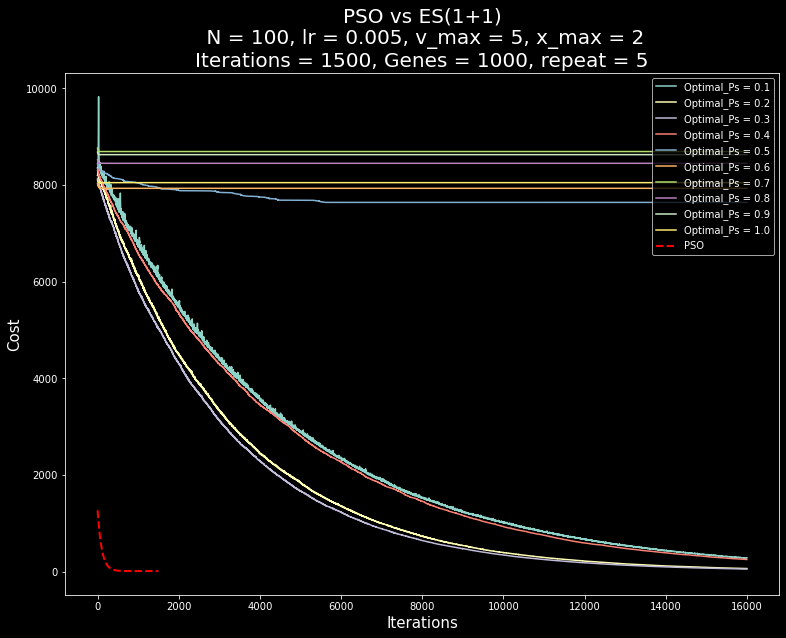

In [171]:
evals = 1500
for i in range(len(costs_ES[0])):
    plt.plot(np.arange(len(costs_ES[:,i])),costs_ES[:,i], label = 'Optimal_Ps = {}'.format(optimal_Ps[0,i]))
plt.plot(np.arange(len(costs_PSO)),costs_PSO,linestyle='--',color = 'red',label = 'PSO',linewidth=2)
plt.title('PSO vs ES(1+1)\n N = {}, lr = {}, v_max = {}, x_max = {}\nIterations = {}, Genes = {}, repeat = {}'.format(n,lr,v_max,x_max,evals,genes,repeat),size = 20)
plt.xlabel('Iterations',size = 15)
plt.ylabel('Cost',size = 15)
plt.legend(loc="upper right")

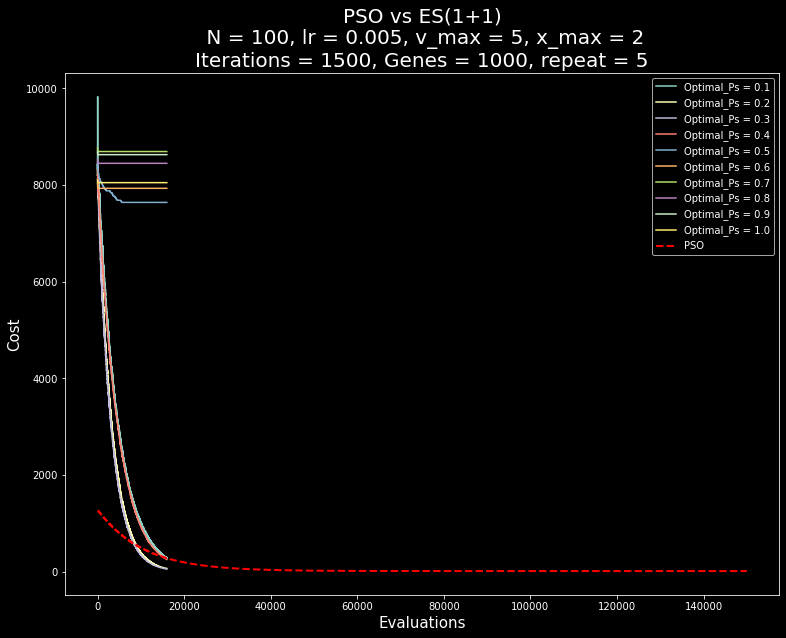

In [170]:
for i in range(len(costs_ES[0])):
    plt.plot(np.arange(len(costs_ES[:,i])),costs_ES[:,i], label = 'Optimal_Ps = {}'.format(optimal_Ps[0,i]))
plt.plot(np.arange(len(costs_PSO2)),costs_PSO2,linestyle='--',color = 'red',label = 'PSO',linewidth=2)
plt.title('PSO vs ES(1+1)\n N = {}, lr = {}, v_max = {}, x_max = {}\nIterations = {}, Genes = {}, repeat = {}'.format(n,lr,v_max,x_max,evals,genes,repeat),size = 20)
plt.xlabel('Evaluations',size = 15)
plt.ylabel('Cost',size = 15)
plt.legend(loc="upper right")

In [161]:
list(costs_ES[:,1][-400:])

[72.99181945754779,
 73.0228642496397,
 72.99456755644373,
 73.07047596999605,
 72.94265894798481,
 72.93352256758251,
 73.01179908503613,
 72.83274743599523,
 72.94596082971566,
 72.82716439793703,
 72.77678845866691,
 72.89257817591248,
 72.7931927286248,
 72.91157874315931,
 72.71482788909036,
 72.94390205144387,
 72.73972192266805,
 73.01989271311517,
 72.91319904757495,
 72.7770002988892,
 72.78116095964545,
 72.81670832316628,
 72.78294166775876,
 72.93274968145371,
 72.72101397730164,
 72.67263212703111,
 72.75446034395688,
 72.85743264637065,
 72.65015754773356,
 72.95745617172024,
 73.12023879307986,
 73.0585788101374,
 72.98378442593408,
 73.00245969092254,
 72.65914410894638,
 72.72382424764764,
 72.34074914500265,
 72.29281638024656,
 72.32644619716605,
 72.50252930377744,
 72.15513340307666,
 72.14984956847314,
 72.13438241967378,
 72.28264567625546,
 72.18200819382267,
 72.10721884995871,
 72.22680450215094,
 72.06995500631295,
 71.87219916049287,
 71.97110415775661,
 71.